# VISUALIZATIONS ON SALES DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

In [2]:
sales = pd.read_csv("D:\Analytics lab\Python\Case Study\Python Foundation Case Study 4 - Python Visualization Case Study\SalesData.csv")
sales

AccountId  AccountName   Region       Division        City State  Tier  \
0          1116     Account1     West    DIAMONDBACK   PHOENIX W    AZ   Low   
1          1116     Account1     West    DIAMONDBACK   PHOENIX W    AZ   Low   
2          2391     Account2     East      MINUTEMEN    HARTFORD    CT   Med   
3          2391     Account2     East      MINUTEMEN    HARTFORD    CT   Med   
4          2397     Account3     East      MINUTEMEN   WORCESTER    MA   Med   
...         ...          ...      ...            ...         ...   ...   ...   
3704       7576  Account2736     East         EMPIRE    SYRACUSE    NY   Out   
3705       4969  Account2740  Central  SOUTHERN STAR  MONTGOMERY    AL   Med   
3706       2850  Account2746     East        SYNERGY   ASHEVILLE    NC  High   
3707    1102265  Account2748     West    DIAMONDBACK  SCOTTSDALE    AZ   Out   
3708      47282  Account2750     West       CHARGERS    SAN JOSE    CA   Low   

     Month  Sales2015  Sales2016  Units2015  Units2016  TargetAchevied2015  \
0      Aug       0.00   13208.52        0.0        4.0                0.70   
1      Oct   10500.78   23114.91        3.0        7.0                0.84   
2      Jun       0.00    6627.00        0.0        3.0                1.15   
3      Mar   19881.00   13254.00        9.0        6.0                1.33   
4      Sep    3684.48       0.00        1.0        0.0                1.02   
...    ...        ...        ...        ...        ...                 ...   
3704   Feb    3684.48       0.00        1.0        0.0                1.06   
3705   Aug    3684.48       0.00        1.0        0.0                0.96   
3706   Nov    5067.70       0.00        2.0        0.0                1.11   
3707   Jan    3684.48       0.00        1.0        0.0                1.31   
3708   Jun    2858.71       0.00        1.0        0.0                1.33   

      TargetAchevied2016  
0                   1.53  
1                   1.31  
2                   1.29  
3                   1.17  
4                   1.53  
...                  ...  
3704                1.14  
3705                1.11  
3706                1.55  
3707                1.48  
3708                1.01  

[3709 rows x 14 columns]

### Q1. Compare Sales by region for 2016 with 2015 using bar chart

In [3]:
sales.nunique()

AccountId             2292
AccountName           2293
Region                   3
Division                26
City                   203
State                   44
Tier                     4
Month                   12
Sales2015             1033
Sales2016             1096
Units2015              133
Units2016              142
TargetAchevied2015      73
TargetAchevied2016      67
dtype: int64

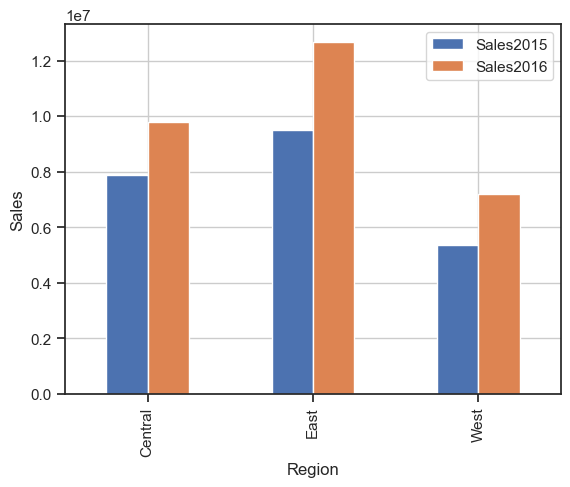

In [8]:
sales.groupby('Region')[['Sales2015','Sales2016']].sum().plot(kind = 'bar',grid=True)
plt.ylabel('Sales')
plt.show()

### Q2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.

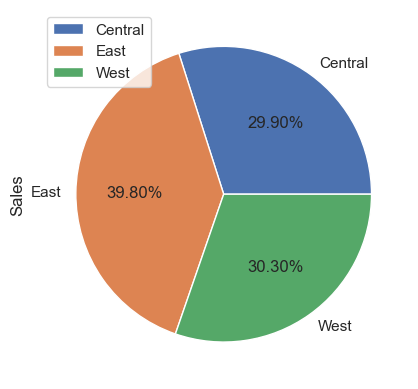

In [19]:
sales.groupby('Region').Sales2016.mean().plot(kind = 'pie',autopct = '%1.2f%%')
plt.ylabel('Sales')
plt.legend(loc = 'upper left')
plt.show()

### Q3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

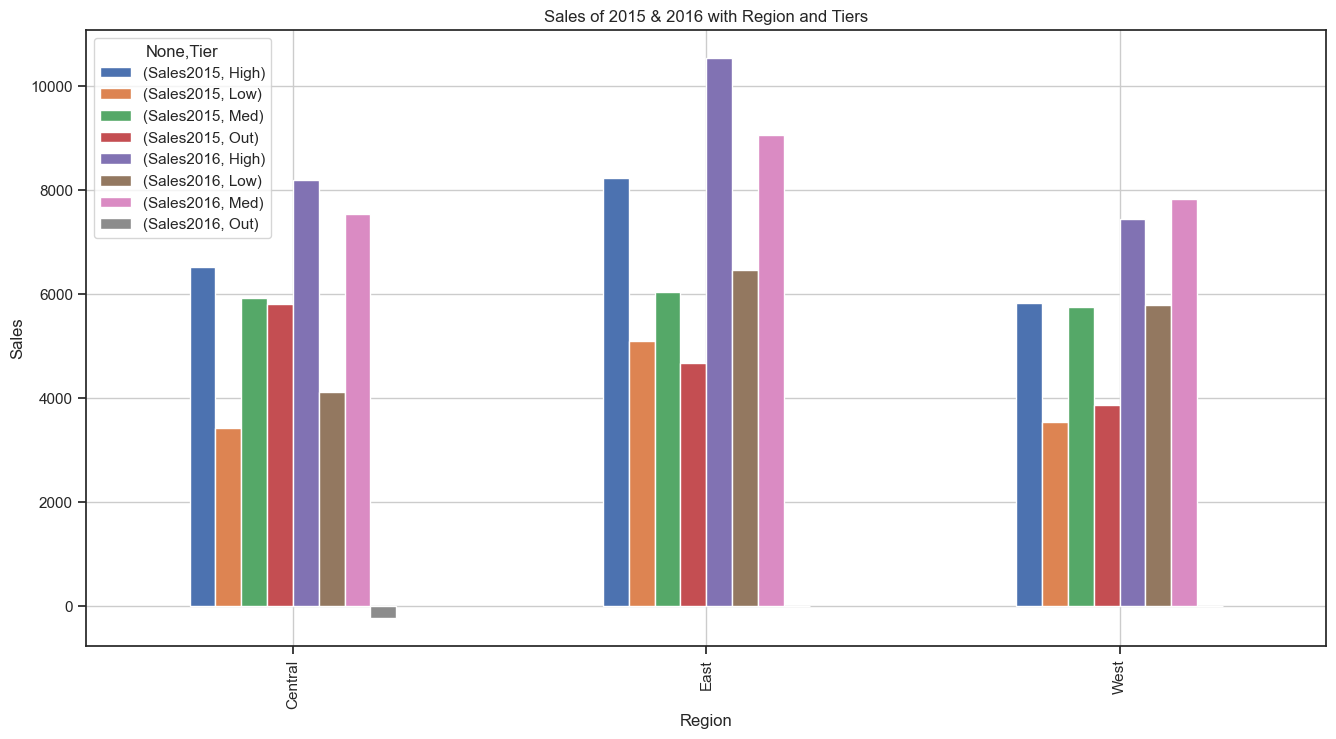

In [22]:
s = sales[["Region", "Tier", "Sales2015", "Sales2016"]].pivot_table(index = "Region", columns = "Tier", values=["Sales2015","Sales2016"])
s.plot.bar(figsize = (16,8), ylabel = "Sales", title = "Sales of 2015 & 2016 with Region and Tiers", grid = "True")
plt.show()

### Q4. In East region, which state registered a decline in 2016 as compared to 2015?

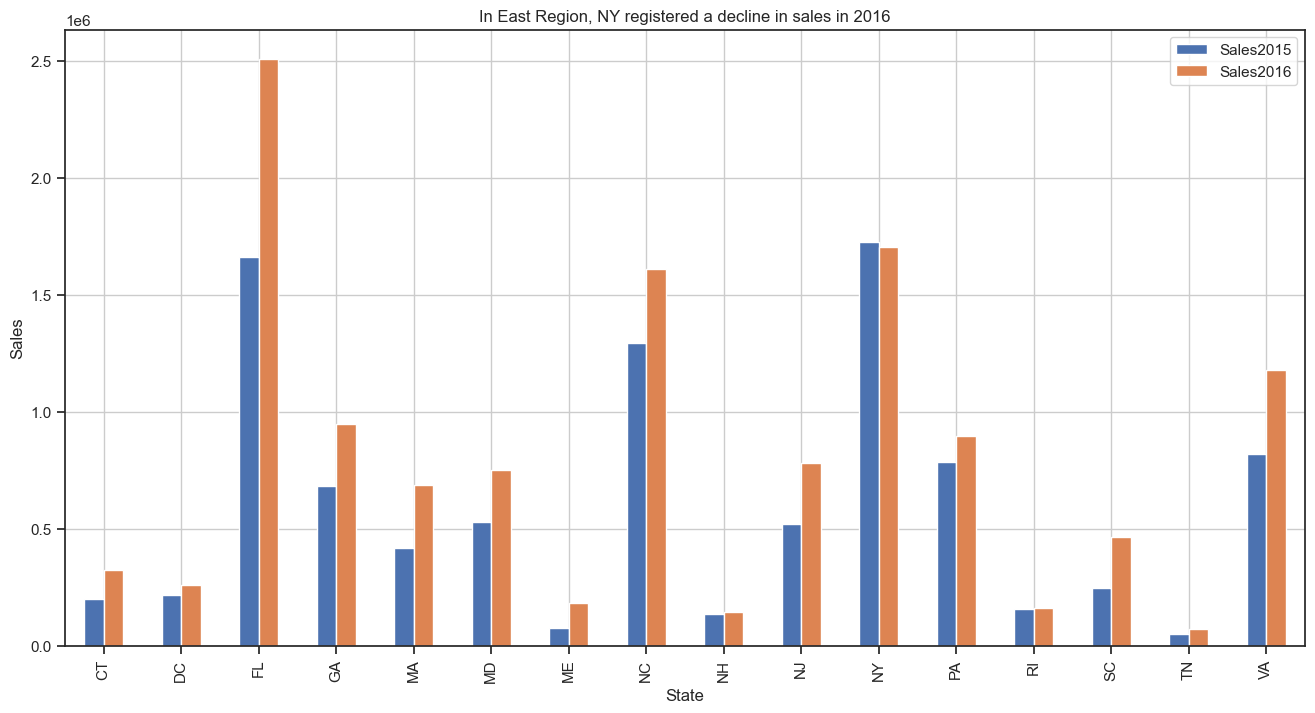

In [26]:
s1 = sales.loc[(sales.Region == 'East')]
s2 = s1.groupby(['State'])[['Sales2015','Sales2016']].sum()

s2.plot.bar(figsize=(16,8),grid = True)
plt.ylabel('Sales')
plt.title ("In East Region, NY registered a decline in sales in 2016")
plt.show()

In [27]:
## In East Region, NY registered a decline in sales in 2016

### Q5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?

In [29]:
s3 = sales[["Division", "Tier", "Units2015", "Units2016"]].loc[sales.Tier == "High", :].groupby("Division").sum(["Units2015","Units2016"])

<AxesSubplot:xlabel='Division', ylabel='Sales'>

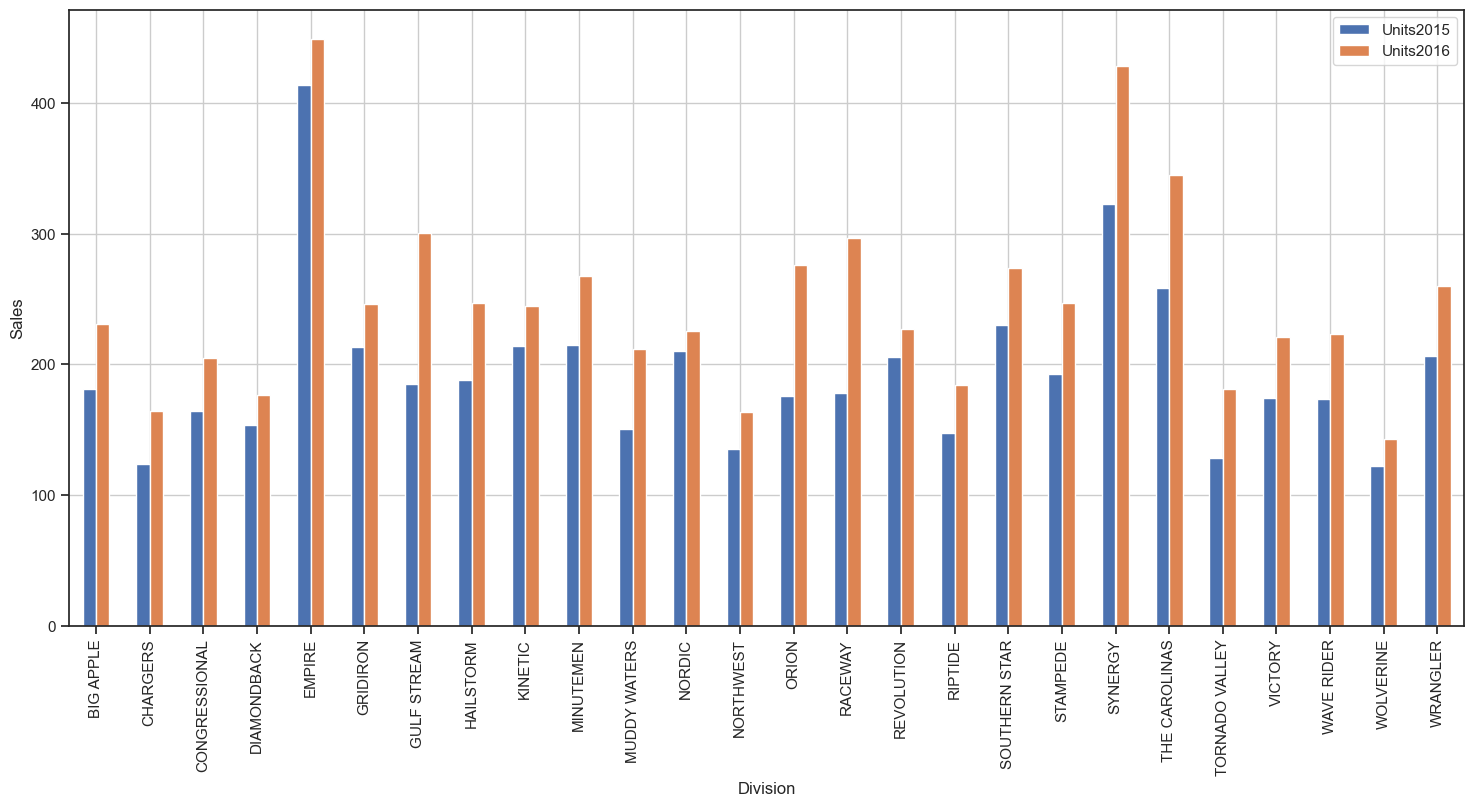

In [30]:
s3.plot.bar(y = ["Units2015", "Units2016"], figsize = (18,8), ylabel="Sales",grid = True)

## Q6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset.

In [31]:
Month_Qtr = {'Jan':'Q1','Feb':'Q1','Mar':'Q1','Apr':'Q2','May':'Q2','Jun':'Q2','Jul':'Q3','Aug':'Q3','Sep':'Q3','Oct':'Q4','Nov':'Q4','Dec':'Q4'}
sales['Qtr'] = sales['Month'].map(Month_Qtr)
sales

AccountId  AccountName   Region       Division        City State  Tier  \
0          1116     Account1     West    DIAMONDBACK   PHOENIX W    AZ   Low   
1          1116     Account1     West    DIAMONDBACK   PHOENIX W    AZ   Low   
2          2391     Account2     East      MINUTEMEN    HARTFORD    CT   Med   
3          2391     Account2     East      MINUTEMEN    HARTFORD    CT   Med   
4          2397     Account3     East      MINUTEMEN   WORCESTER    MA   Med   
...         ...          ...      ...            ...         ...   ...   ...   
3704       7576  Account2736     East         EMPIRE    SYRACUSE    NY   Out   
3705       4969  Account2740  Central  SOUTHERN STAR  MONTGOMERY    AL   Med   
3706       2850  Account2746     East        SYNERGY   ASHEVILLE    NC  High   
3707    1102265  Account2748     West    DIAMONDBACK  SCOTTSDALE    AZ   Out   
3708      47282  Account2750     West       CHARGERS    SAN JOSE    CA   Low   

     Month  Sales2015  Sales2016  Units2015  Units2016  TargetAchevied2015  \
0      Aug       0.00   13208.52        0.0        4.0                0.70   
1      Oct   10500.78   23114.91        3.0        7.0                0.84   
2      Jun       0.00    6627.00        0.0        3.0                1.15   
3      Mar   19881.00   13254.00        9.0        6.0                1.33   
4      Sep    3684.48       0.00        1.0        0.0                1.02   
...    ...        ...        ...        ...        ...                 ...   
3704   Feb    3684.48       0.00        1.0        0.0                1.06   
3705   Aug    3684.48       0.00        1.0        0.0                0.96   
3706   Nov    5067.70       0.00        2.0        0.0                1.11   
3707   Jan    3684.48       0.00        1.0        0.0                1.31   
3708   Jun    2858.71       0.00        1.0        0.0                1.33   

      TargetAchevied2016 Qtr  
0                   1.53  Q3  
1                   1.31  Q4  
2                   1.29  Q2  
3                   1.17  Q1  
4                   1.53  Q3  
...                  ...  ..  
3704                1.14  Q1  
3705                1.11  Q3  
3706                1.55  Q4  
3707                1.48  Q1  
3708                1.01  Q2  

[3709 rows x 15 columns]

## Q7. Compare Qtr wise sales in 2015 and 2016 in a bar plot

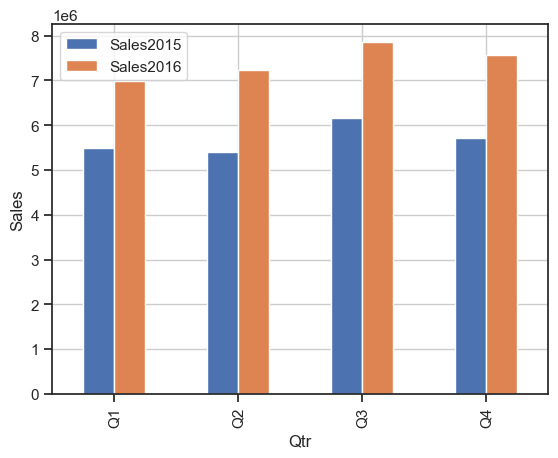

In [33]:
sales.groupby('Qtr')[['Sales2015','Sales2016']].sum().plot(kind = 'bar',grid=True)
plt.ylabel('Sales')
plt.show()

## Q8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.

In [36]:
sales.Sales2015 = np.where(sales.Sales2015<0,0,sales.Sales2015)

In [38]:
s4 = pd.pivot_table(data=sales,index="Tier",columns="Qtr",values="Sales2015",aggfunc='sum')

In [39]:
a = s4['Q1']
b = s4['Q2']
c = s4['Q3']
d = s4['Q4']

Text(0.5, 1.0, 'Q4')

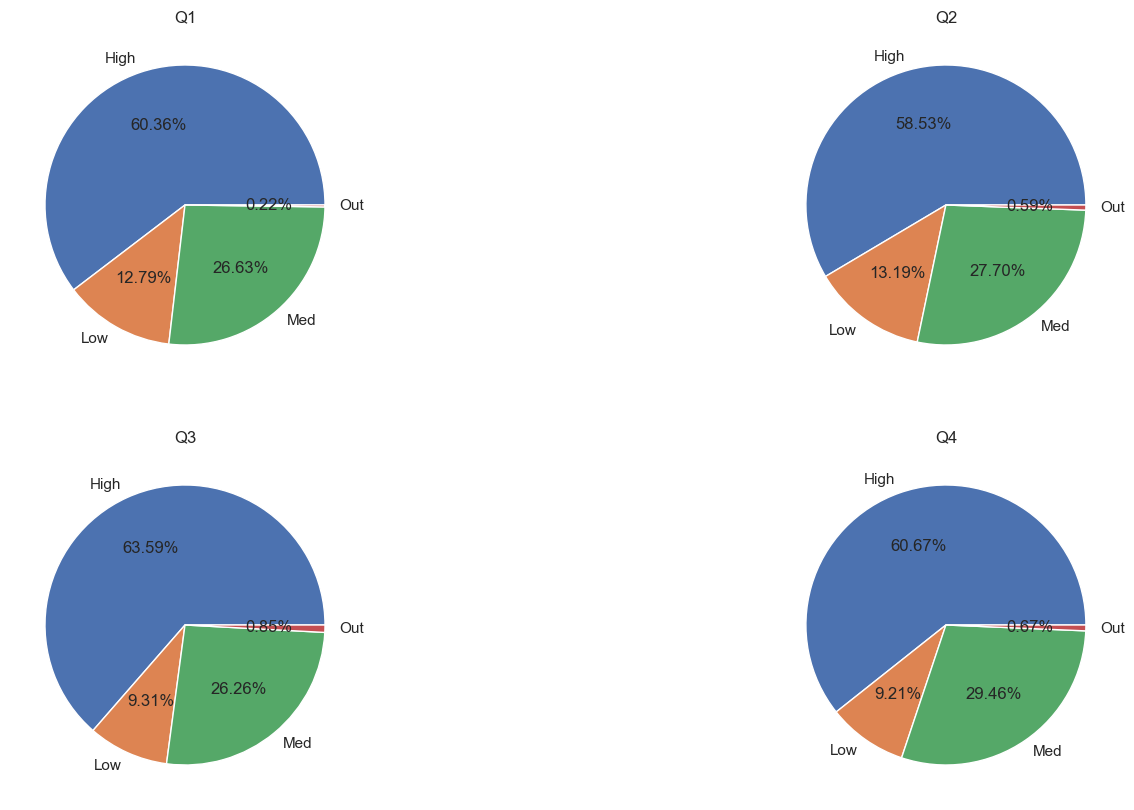

In [40]:
fig = plt.figure(figsize=(18,10))
#1
ax = plt.subplot2grid((2,2),(0,0))
plt.pie(data=a,x =a.values,autopct='%.2f%%',labels=a.index)
plt.title('Q1')
#2
ax = plt.subplot2grid((2,2),(0,1))
plt.pie(data=b,x =b.values,autopct='%.2f%%',labels=b.index)
plt.title('Q2')
#3
ax = plt.subplot2grid((2,2),(1,0))
plt.pie(data=c,x =c.values,autopct='%.2f%%',labels=c.index)
plt.title('Q3')
#4
ax = plt.subplot2grid((2,2),(1,1))
plt.pie(data=d,x =d.values,autopct='%.2f%%',labels=d.index)
plt.title('Q4')